In [ ]:
!pip install sodapy

import urllib3
from urllib3 import request

import json

import certifi

import pandas

from sodapy import Socrata

def download_data(url, is_trips=False):
  """ 
  Returns pandas.DataFrame from provided API URL
  """
  http = urllib3.PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())

  r = http.request('GET', url)
  data = json.loads(r.data.decode('utf-8'))
  json_dataframe = pandas.json_normalize(data)
  
  return json_dataframe

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# BDPA Datahon Notebook

This is the notebook for the prompts for the BDPA Datathon.  Please run all cells in the notebook to download the data and setup a basic environment.

For python code, create a new cell and add your code.  If you are using R, add the following to the beginning of your cell:
``` 
%%R 
```
Then enter your code on the next line.

Be aware! This is real data, there may be missing values or anomalies.

## Table of Contents

1.   [Data Download](#download_link)
    1. [COVID-19 Reported Patient Impact and Hospital Capacity by State Timeseries](#cdc_hospital)
    2. [COVID-19 States Current and Historical Data](#covid)
    3. [Trips by distance](#trips)
2.   [Analysis](#analysis)
3.  [Submission](#submission)
<a name="download_link"></a>
## Download the data
The following sections will download the necessary data for the further datathon tasks.

<a name="cdc_hospital"></a>
### COVID-19 Reported Patient Impact and Hospital Capacity by State Timeseries

Data comes from the CDC API and is described [here](https://beta.healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh)

>The following dataset provides state-aggregated data for hospital utilization in a timeseries format dating back to January 1, 2020. These are derived from reports with facility-level granularity across three main sources: (1) HHS TeleTracking, (2) reporting provided directly to HHS Protect by state/territorial health departments on behalf of their healthcare facilities and (3) National Healthcare Safety Network (before July 15).



In [ ]:
client = Socrata("healthdata.gov", None)
results = client.get("g62h-syeh", where="date >= '2021-01-01'", limit=15000)

# Convert to pandas DataFrame
cdc_patient_hospital_df = pandas.DataFrame.from_records(results)

cdc_patient_hospital_df['date'] = pandas.to_datetime(
    cdc_patient_hospital_df['date'])
df_cols = cdc_patient_hospital_df.columns.to_list()
df_cols.remove('date')
cdc_patient_hospital_df[df_cols] = cdc_patient_hospital_df[df_cols].apply(
    pandas.to_numeric, errors='ignore')
cdc_patient_hospital_df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,...,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18_19,previous_day_admission_adult_covid_confirmed_18_19_coverage,previous_day_admission_adult_covid_confirmed_20_29,previous_day_admission_adult_covid_confirmed_20_29_coverage,previous_day_admission_adult_covid_confirmed_30_39,previous_day_admission_adult_covid_confirmed_30_39_coverage,previous_day_admission_adult_covid_confirmed_40_49,previous_day_admission_adult_covid_confirmed_40_49_coverage,previous_day_admission_adult_covid_confirmed_50_59,previous_day_admission_adult_covid_confirmed_50_59_coverage,previous_day_admission_adult_covid_confirmed_60_69,previous_day_admission_adult_covid_confirmed_60_69_coverage,previous_day_admission_adult_covid_confirmed_70_79,previous_day_admission_adult_covid_confirmed_70_79_coverage,previous_day_admission_adult_covid_confirmed_80,previous_day_admission_adult_covid_confirmed_80_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18_19,previous_day_admission_adult_covid_suspected_18_19_coverage,previous_day_admission_adult_covid_suspected_20_29,previous_day_admission_adult_covid_suspected_20_29_coverage,previous_day_admission_adult_covid_suspected_30_39,previous_day_admission_adult_covid_suspected_30_39_coverage,previous_day_admission_adult_covid_suspected_40_49,previous_day_admission_adult_covid_suspected_40_49_coverage,previous_day_admission_adult_covid_suspected_50_59,previous_day_admission_adult_covid_suspected_50_59_coverage,previous_day_admission_adult_covid_suspected_60_69,previous_day_admission_adult_covid_suspected_60_69_coverage,previous_day_admission_adult_covid_suspected_70_79,previous_day_admission_adult_covid_suspected_70_79_coverage,previous_day_admission_adult_covid_suspected_80_,previous_day_admission_adult_covid_suspected_80_coverage,previous_day_admission_adult_covid_suspected_unknown,previous_day_admission_adult_covid_suspected_unknown_coverage,deaths_covid,deaths_covid_coverage
0,MO,2021-01-01,23,98,19,32,89,19,33,136,17833,140,13222,140,2703,136,266,140,209,136,2,136,22,136,1574,140,678,136,638,140,2662,13

<a name="covid"></a>
## COVID-19 States current and historical data
Data comes from the covidtracking.com [site](https://covidtracking.com/data/api)

Check under States Current and Historical Data > Historic values for all states for a description.


In [86]:
covid_url = 'https://api.covidtracking.com/v1/states/daily.json'
covid_df = download_data(covid_url)
covid_df['date'] = pandas.to_datetime(covid_df['date'],format='%Y%m%d')
df_cols = covid_df.columns.to_list()

df_cols.remove('date')
covid_df[df_cols] = covid_df[df_cols].apply(
    pandas.to_numeric, errors='ignore')
covid_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,NaN,NaN,2.0,NaN,NaN,3/5/2021 03:59,2021-03-05T03:59:00Z,03/04 22:59,305.0,1293.0,NaN,2021-03-05T03:59:00Z,1731628.0,68693.0,1660758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,56886,0,56886,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,NaN,2676.0,NaN,1515.0,295690.0,3/7/2021 11:00,2021-03-07T11:00:00Z,03/07 06:00,10148.0,45976.0,NaN,2021-03-07T11:00:00Z,NaN,NaN,NaN,392077.0,7963.0,2185.0,NaN,2323788.0,NaN,NaN,NaN,119757.0,NaN,NaN,NaN,NaN,NaN,NaN,1,408,2087,2431530,2347,2431530,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,141.0,NaN,65.0,1533.0,315517.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,5319.0,14926.0,NaN,2021-03-07T00:00:00Z,2736442.0,NaN,2480716.0,255726.0,4308.0,1011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481311.0,81803.0,NaN,NaN,5,165,3267,2805534,3380,2805534,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,NaN,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,NaN
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,273.0,NaN,143.0,NaN,NaN,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,16328.0,57907.0,118932.0,2021-03-07T00:00:00Z,7908105.0,NaN,NaN,769935.0,14403.0,1925.0,NaN,3842945.0,580569.0,NaN,NaN,444089.0,NaN,NaN,NaN,NaN,NaN,NaN,4,1335,13678,3899464,45110,3899464,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


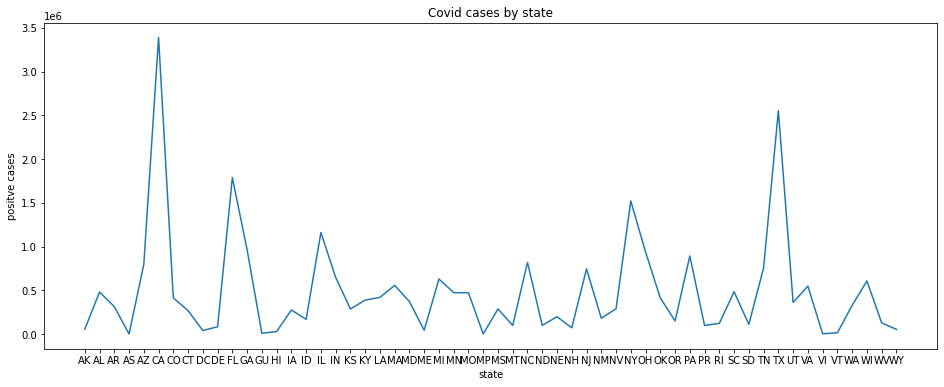

NameError: ignored

In [91]:
#Bronson Wooods question 1

import pandas as pd
filtered_covid_df = covid_df.loc[covid_df['date'] == "2021-02-13 00:00:00"]
#print(filtered_covid_df)

filtered_covid_df['positive'].max()
filtered_covid_df[filtered_covid_df['positive'] == 3391036.0]

#df = pd.DataFrame({'States':[filtered_covid_df['state']], 'Positive Cases':[0]})
#ax = df.plot.bar(x='States', y='Positive Cases', rot=0, color="red")

import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(filtered_covid_df['state'], filtered_covid_df['positive'])
plt.title('Covid cases by state')
plt.xlabel('state')
plt.ylabel('positve cases')
plt.show()

filtered_covid_df = filtercovid_df.groupby('states')['positives'].sum()
filtered_covid_df = filtercovid_states.reset_index()
print(filtercovid_states)


In [88]:
filtered_covid_df.sort_values(by=['positive'])

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
1235,2021-02-13,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,NaN,0,0,0e02c944f57fe67420f8cce101ea50572d48c79b,0,0,0,0,0,NaN
1259,2021-02-13,MP,134.0,NaN,17429.0,NaN,posNeg,17563.0,NaN,4.0,NaN,NaN,NaN,NaN,29.0,2/12/2021 00:00,2021-02-12T00:00:00Z,02/11 19:00,2.0,4.0,NaN,2021-02-12T00:00:00Z,26131.0,NaN,NaN,134.0,2.0,NaN,NaN,17542.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,0,0,17563,0,17563,NaN,0,0,94ea01c4876efee27016d917491a0d3ed7367c3e,0,0,0,0,0,NaN
1282,2021-02-13,VI,2524.0,NaN,41924.0,99.0,posNeg,44448.0,NaN,NaN,NaN,NaN,NaN,NaN,2399.0,2/12/2021 09:41,2021-02-12T09:41:00Z,02/12 04:41,25.0,NaN,NaN,2021-02-12T09:41:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44547.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,0,0,44547,0,44448,NaN,0,0,abd9a7ce76ffbb8310c5b7f4105431148b5f2dc6,0,0,0,0,0,NaN
1244,2021-02-13,GU,7692.0,208.0,104539.0,NaN,posNeg,112231.0,7.0,NaN,4.0,NaN,2.0,NaN,7472.0,2/13/2021 04:00,2021-02-13T04:00:00Z,02/12 23:00,130.0,NaN,NaN,2021-02-13T04:00:00Z,112020.0,NaN,NaN,7484.0,NaN,NaN,NaN,NaN,347.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,8727.0,247.0,66,3,0,112231,3,112231,NaN,0,0,f7f85ab0eda8e3ffe6d95c15d6cda093a8164149,0,0,0,0,0,NaN
1283,2021-02-13,VT,13561.0,342.0,303219.0,NaN,totalTestsViral,958666.0,49.0,NaN,8.0,NaN,NaN,NaN,10547.0,2/12/2021 23:59,2021-02-12T23:59:00Z,02/12 18:59,189.0,NaN,NaN,2021-02-12T23:59:00Z,958666.0,NaN,NaN,13219.0,NaN,NaN,NaN,316438.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,146,442,316780,-2876,316780,NaN,0,0,00600d7a926d5b1000520a05efd4c6660db9a6a8,0,0,0,0,0,NaN
1245,2021-02-13,HI,27527.0,717.0,NaN,NaN,totalTestEncountersViral,1029156.0,40.0,2149.0,13.0,NaN,10.0,NaN,NaN,2/11/2021 14:30,2021-02-11T14:30:00Z,02/11 09:30,425.0,2149.0,NaN,2021-02-11T14:30:00Z,NaN,26354.0,NaN,26810.0,425.0,NaN,1029156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,67,0,27527,5604,27527,NaN,0,0,2d7ea01df6888864df9532457aacb485324ba605,0,0,0,0,0,NaN
1240,2021-02-13,DC,38796.0,NaN,NaN,NaN,totalTestEncountersViral,1163922.0,191.0,NaN,48.0,NaN,26.0,NaN,27549.0,2/12/2021 00:00,2021-02-12T00:00:00Z,02/11 19:00,979.0,NaN,NaN,2021-02-12T00:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,1163922.0,426830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,126,0,38796,9613,38796,NaN,3,0,7839173391b4c2f138cbfebcca3a6296f3404e25,0,0,0,0,0,NaN
1255,2021-02-13,ME,42419.0,8596.0,NaN,NaN,totalTestsViral,1468870.0,100.0,1476.0,27.0,NaN,9.0,NaN,12641.0,2/12/2021 23:59,2021-02-12T23:59:00Z,02/12 18:59,647.0,1476.0,NaN,2021-02-12T23:59:00Z,1468870.0,39087.0,NaN,33823.0,634.0,13.0,NaN,NaN,14712.0,762.0,13938.0,NaN,NaN,NaN,NaN,NaN,170971.0,9243.0,23,160,0,42419,7598,42419,NaN,4,7,b00118da2e2c1b152f4cf85a014447bf608ad43f,0,0,0,0,0,NaN
1287,2021-02-13,WY,53086.0,7875.0,175047.0,NaN,totalTestsViral,604578.0,44.0,1311.0,NaN,NaN,NaN,NaN,51640.0,2/12/2021 00:00,2021-02-12T00:00:00Z,02/11 19:00,647.0,1311.0,NaN,2021-02-12T00:00:00Z,604578.0,37735.0,559222.0,45211.0,NaN,NaN,NaN,220258.0,Na

<a name="trips"></a>
## Trips by distance
Data comes from the Department of Transportation and is described [here](https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv)

>How many people are staying at home? How far are people traveling when they don’t stay home? Which states and counties have more people taking trips? The Bureau of Transportation Statistics (BTS) now provides answers to those questions through our new mobility statistics.

>The Trips by Distance data and number of people staying home and not staying home are estimated for the Bureau of Transportation Statistics by the Maryland Transportation Institute and Center for Advanced Transportation Technology Laboratory at the University of Maryland. The travel statistics are produced from an anonymized national panel of mobile device data from multiple sources. All data sources used in the creation of the metrics contain no personal information. Data analysis is conducted at the aggregate national, state, and county levels. A weighting procedure expands the sample of millions of mobile devices, so the results are representative of the entire population in a nation, state, or county. To assure confidentiality and support data quality, no data are reported for a county if it has fewer than 50 devices in the sample on any given day.


In [ ]:
client = Socrata("data.bts.gov", None)
results = client.get("w96p-f2qv", where="date >= '2021-01-01'", level='State',
                     limit=12000)
# Convert to pandas DataFrame
trips_df = pandas.DataFrame.from_records(results)
trips_df['date'] = pandas.to_datetime(trips_df['date'])
df_cols = trips_df.columns.to_list()
df_cols.remove('date')
trips_df[df_cols] = trips_df[df_cols].apply(
    pandas.to_numeric, errors='ignore')

# Remove missing values
trips_df['state_code'] = trips_df['state_code'].fillna('')
trips_df.head()

,level,date,state_fips,state_code,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500,row_id
0,State,2021-01-01,5,AR,784999.0,2228826.0,7726159.0,1586823.0,1876104.0,978375.0,1257980.0,1239888.0,443377.0,203865.0,115165.0,20948.0,3634.0,05-00000-20210101
1,State,2021-01-01,6,CA,15719267.0,23837778.0,68806218.0,16433451.0,18410718.0,8266662.0,9412399.0,9184488.0,3990648.0,1869146.0,909470.0,219932.0,109304.0,06-00000-20210101
2,State,2021-01-01,8,CO,1882217.0,3813347.0,17111269.0,4187193.0,4402669.0,2088474.0,2534511.0,2479830.0,782945.0,381901.0,174794.0,45641.0,33311.0,08-00000-20210101
3,State,2021-01-01,9,CT,1136323.0,2436342.0,8242046.0,2067552.0,2264562.0,1055767.0,1214910.0,1106191.0,346064.0,134972.0,38111.0,6971.0,6946.0,09-00000-20210101
4,State,2021-01-01,10,DE,310136.0,657035.0,2110513.0,493919.0,537150.0,278901.0,347628.0,292924.0,99569.0,39666.0,17564.0,2170.0,1022.0,10-00000-20210101


In [ ]:
# Loads the downloaded dataframes into R kernel
%R -i covid_df
%R -i cdc_patient_hospital_df
%R -i trips_df

# Question 2
During that six month period in the state, what proportions of the population not staying at home traveled more than 100 miles away?

In [ ]:
trips_df.head()

,level,date,state_fips,state_code,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500,row_id
0,State,2021-01-01,5,AR,784999.0,2228826.0,7726159.0,1586823.0,1876104.0,978375.0,1257980.0,1239888.0,443377.0,203865.0,115165.0,20948.0,3634.0,05-00000-20210101
1,State,2021-01-01,6,CA,15719267.0,23837778.0,68806218.0,16433451.0,18410718.0,8266662.0,9412399.0,9184488.0,3990648.0,1869146.0,909470.0,219932.0,109304.0,06-00000-20210101
2,State,2021-01-01,8,CO,1882217.0,3813347.0,17111269.0,4187193.0,4402669.0,2088474.0,2534511.0,2479830.0,782945.0,381901.0,174794.0,45641.0,33311.0,08-00000-20210101
3,State,2021-01-01,9,CT,1136323.0,2436342.0,8242046.0,2067552.0,2264562.0,1055767.0,1214910.0,1106191.0,346064.0,134972.0,38111.0,6971.0,6946.0,09-00000-20210101
4,State,2021-01-01,10,DE,310136.0,657035.0,2110513.0,493919.0,537150.0,278901.0,347628.0,292924.0,99569.0,39666.0,17564.0,2170.0,1022.0,10-00000-20210101


In [ ]:
## Maximum date present 
print("Maximum date in the dataframe", trips_df['date'].max())

Maximum date in the dataframe 2021-07-31 00:00:00


In [ ]:
# Total population not staying at home by month


<a name="analysis"></a>
# Analysis
The next section you will provide your own response, code, and visualizations to answer the prompts below.


1. Six months ago which state has had the most positive cases?
2. During that six month period in the state, what proportions of the population not staying at home traveled more than 100 miles away?
3. For the state, what was their capacity for patients during that six month period? Investigate any possible relationship to the travel data.

**Bonus Open-ended question**
    
Using the [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets) identify additional datasource(s) to further describe and visualize the impact of COVID in the locations identified in 2 & 3.

<a name="submission"></a>
# Submission
Please submit a copy of your notebook (ipynb file), a PDF printout of your notebook, and headshots (a fun picture we can include in the awards announcement!) Please email these files to dsacademy@bdpa.org
 
<b>DO NOT ZIP YOUR FILES.
 
<mark>Please also include your team number in the subject line.</mark></b>

